**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/TC4029 - Ciencia y analítica de datos/Actividad9/"
os.chdir(DIR)

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [188]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [189]:
data_df.describe(exclude=[object])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [190]:
data_df.describe(include=['object'])

,diagnosis
count,569
unique,2
top,B
freq,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [191]:
data_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

1c) Búsqueda de valores faltantes.

In [192]:
data_df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

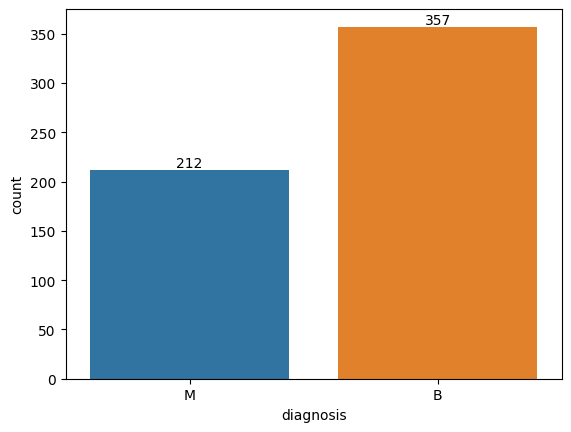

In [193]:
ax = sns.countplot(data=data_df, x='diagnosis')
for i in ax.containers:
    ax.bar_label(i,)

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

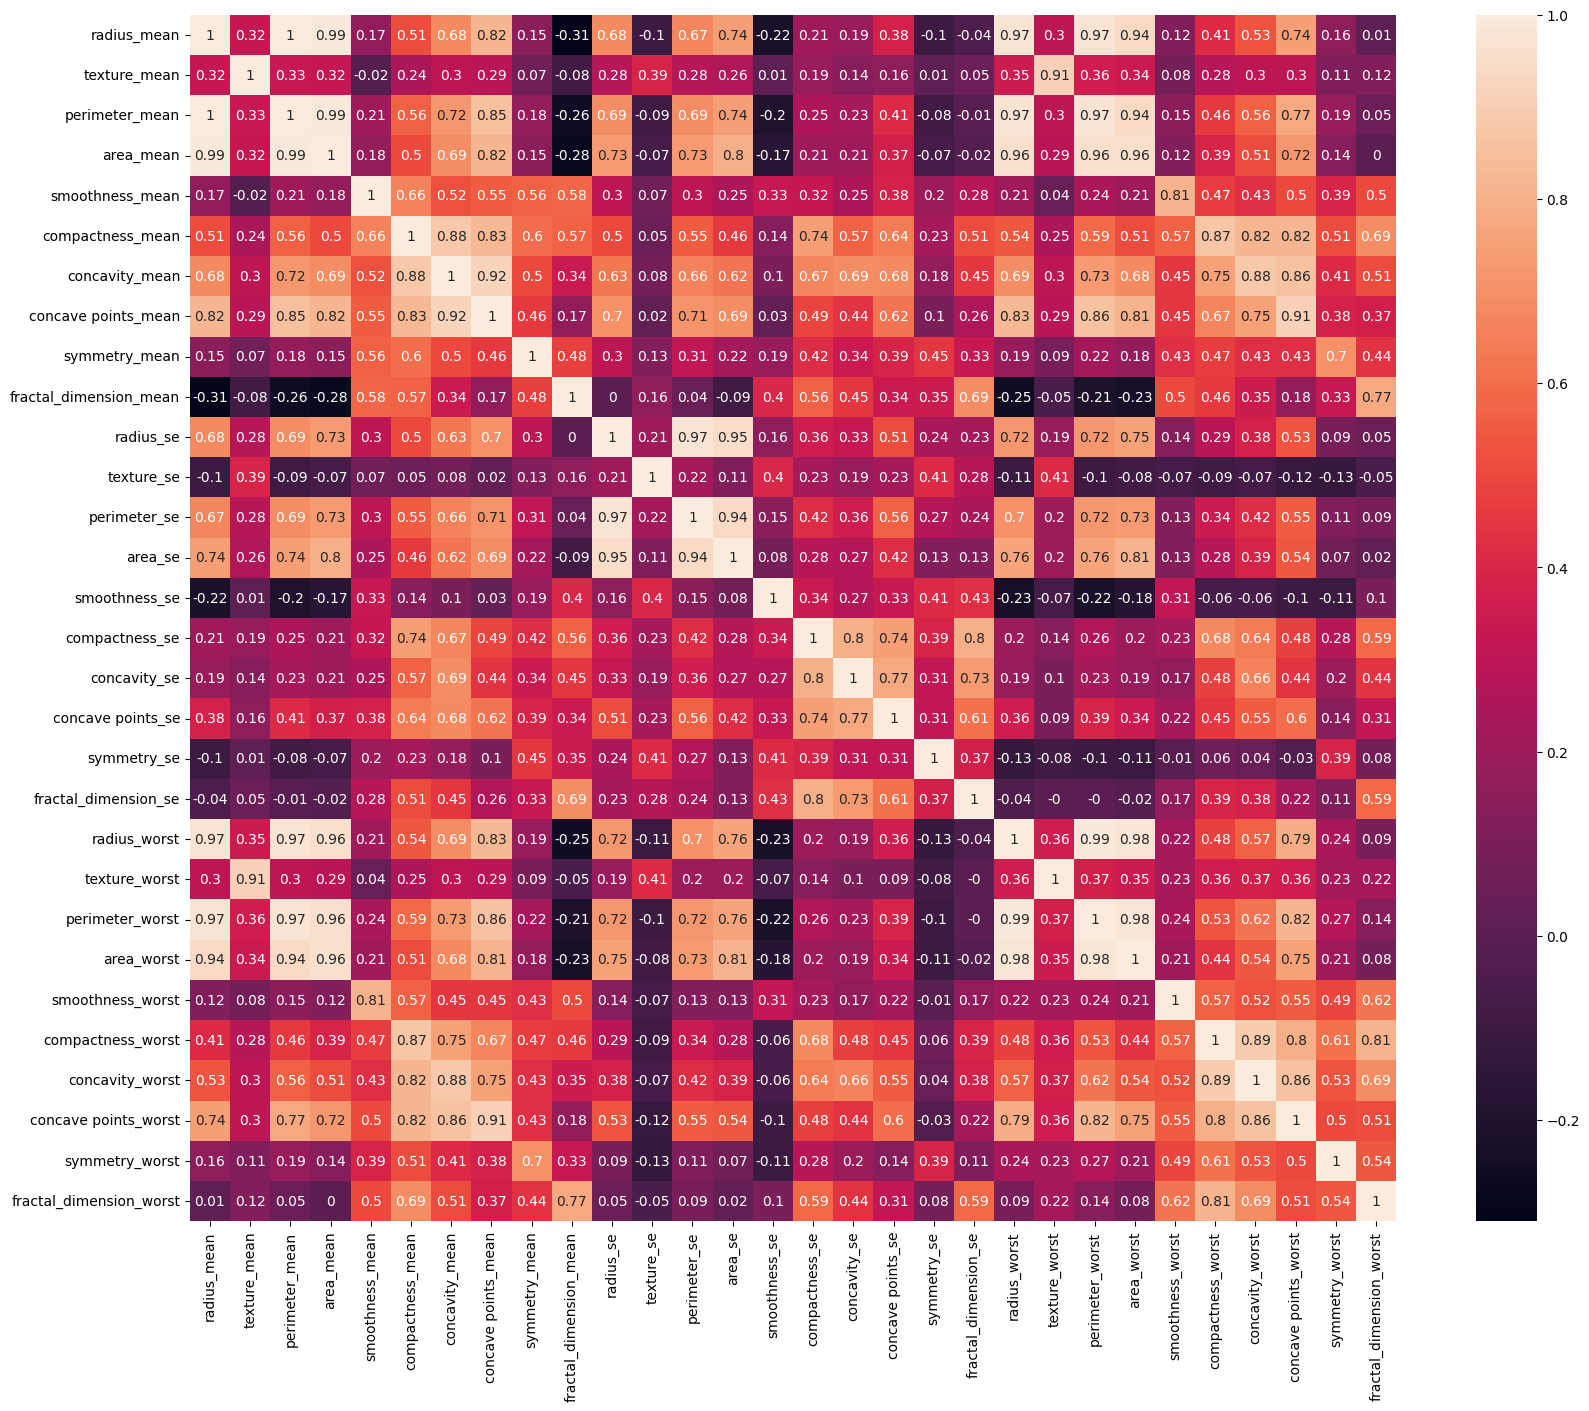

In [194]:
plt.figure(figsize=(18, 14), constrained_layout=True)

correlation = data_df.corr(method='pearson', numeric_only=True)
sns.heatmap(round(correlation, 2), annot = True, square=True)

plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

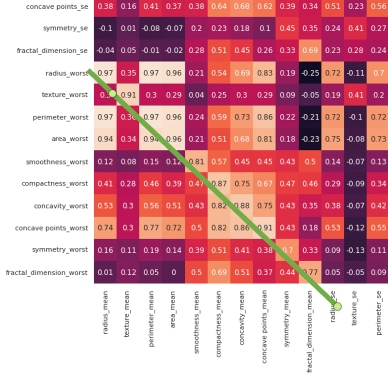

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [195]:
data_df = data_df.loc[:, ~data_df.columns.str.endswith('_worst')]

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




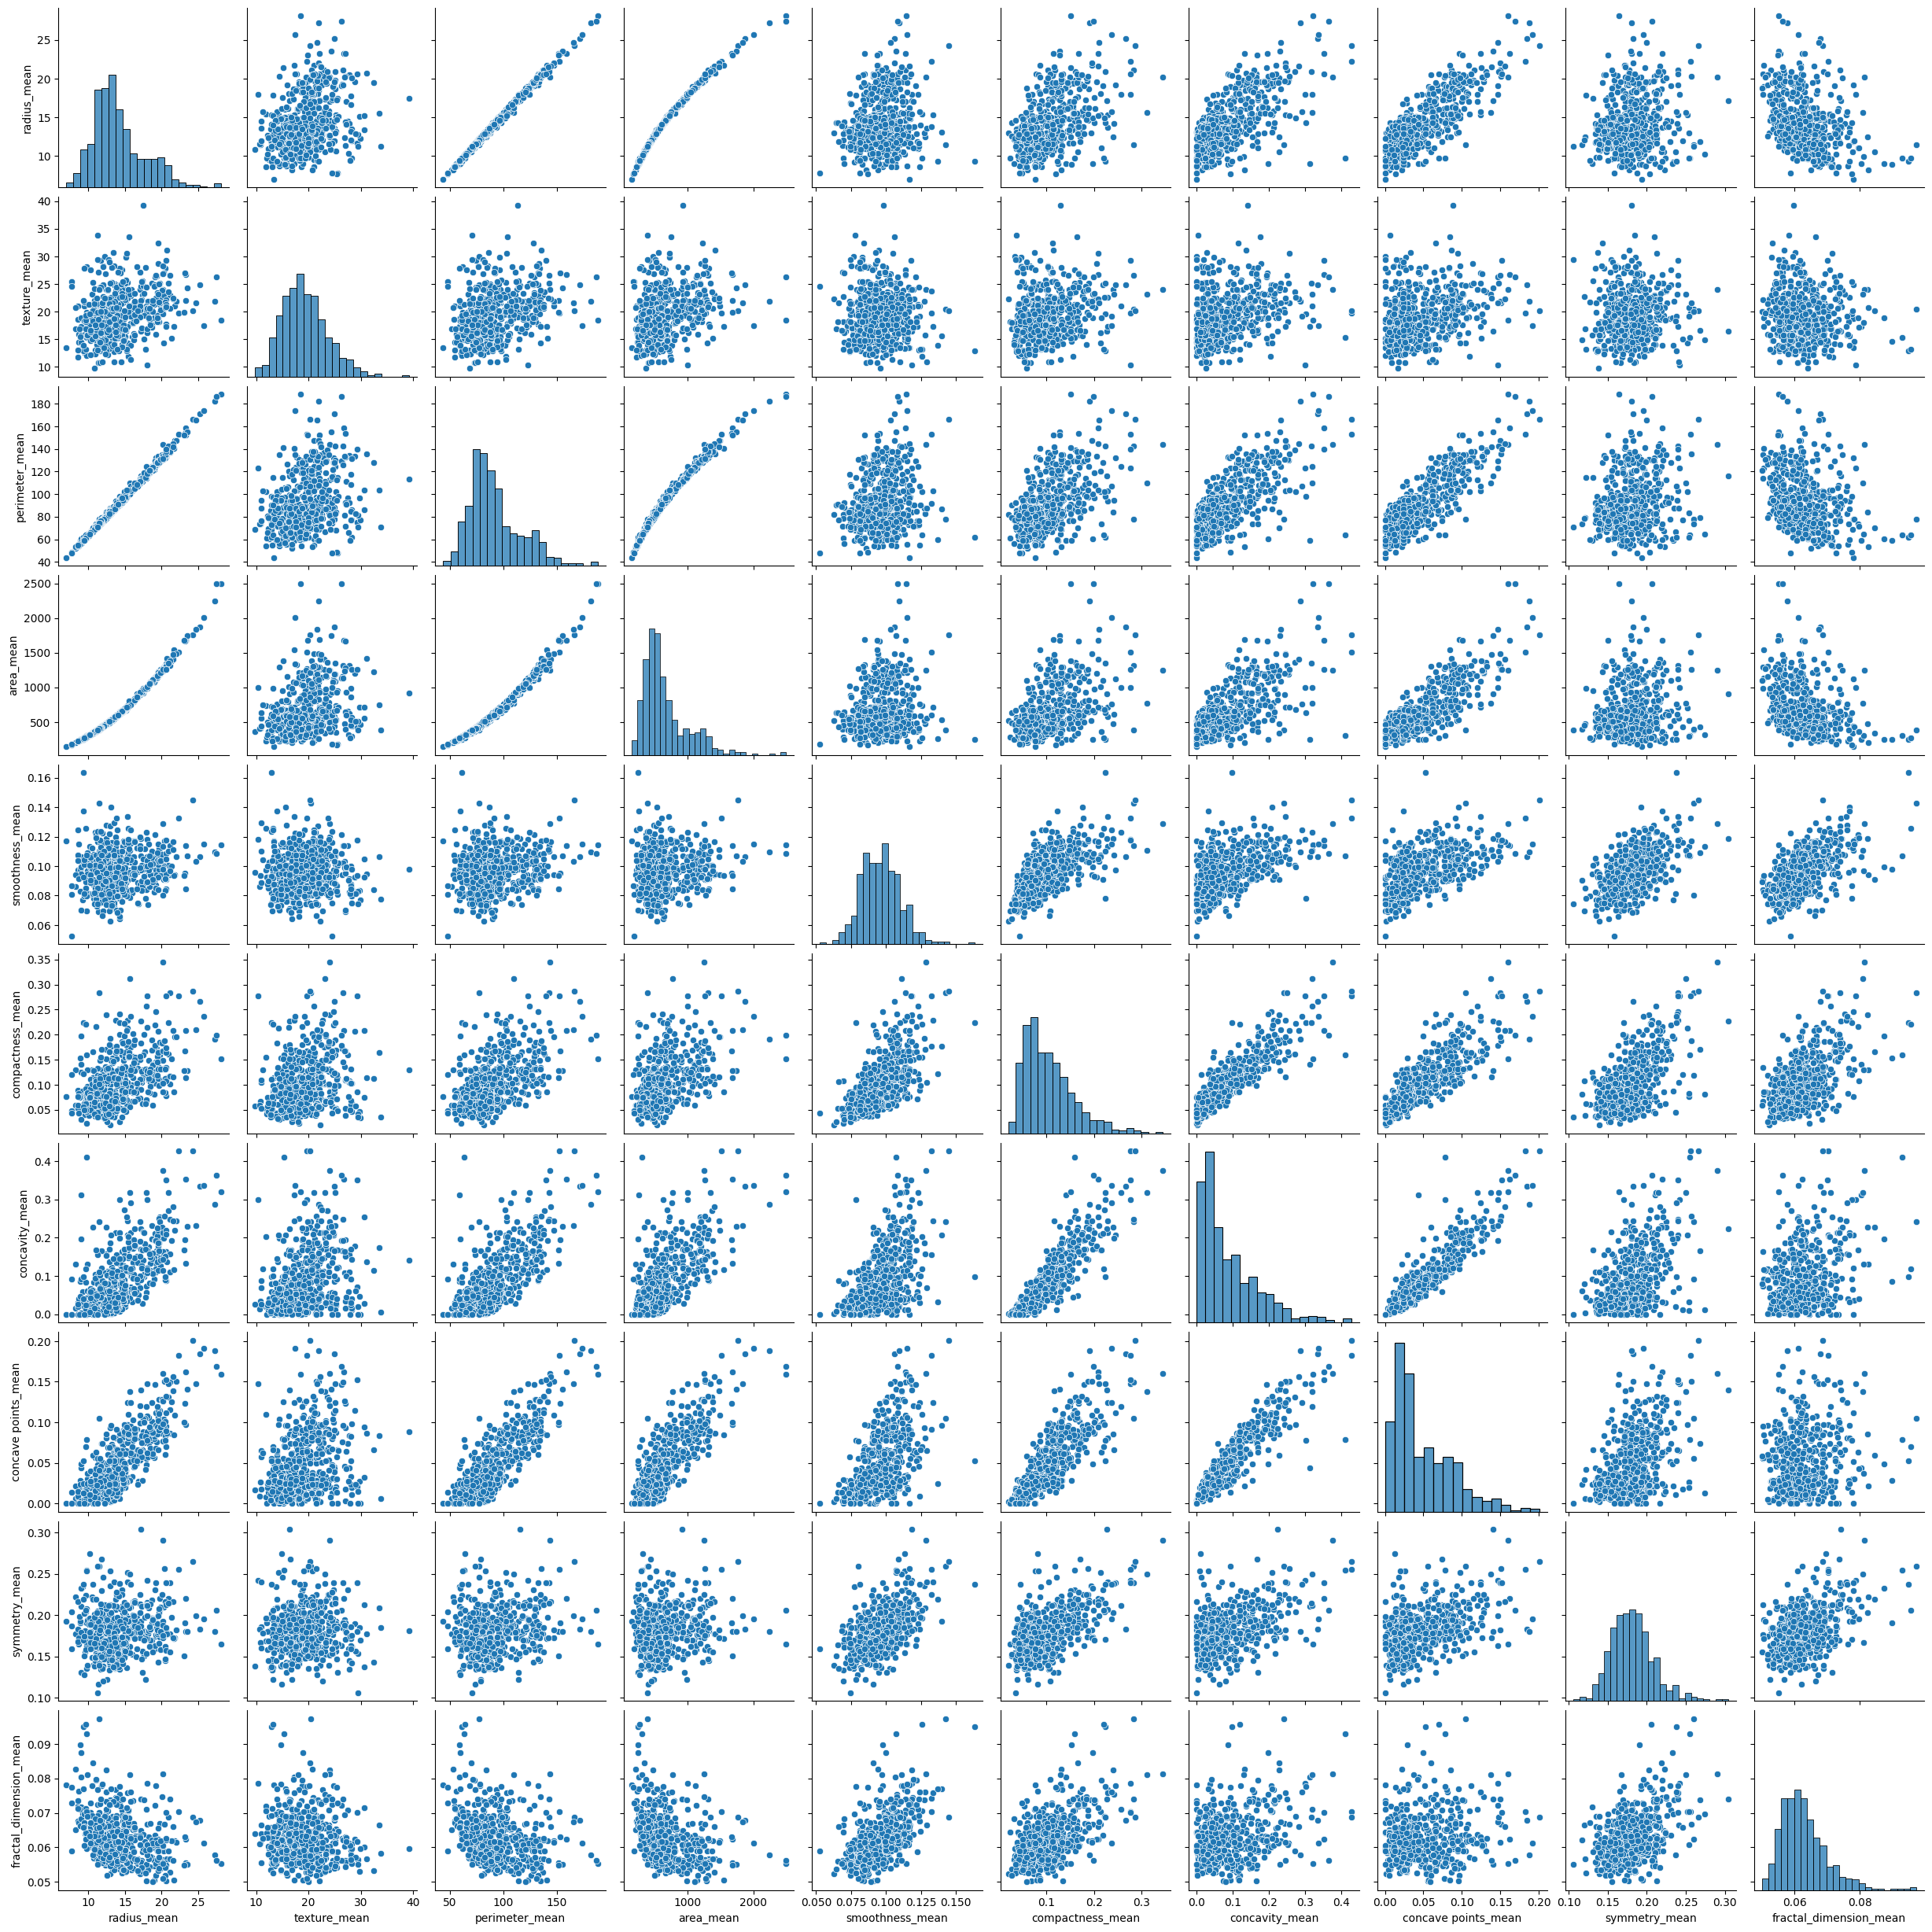

In [ ]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


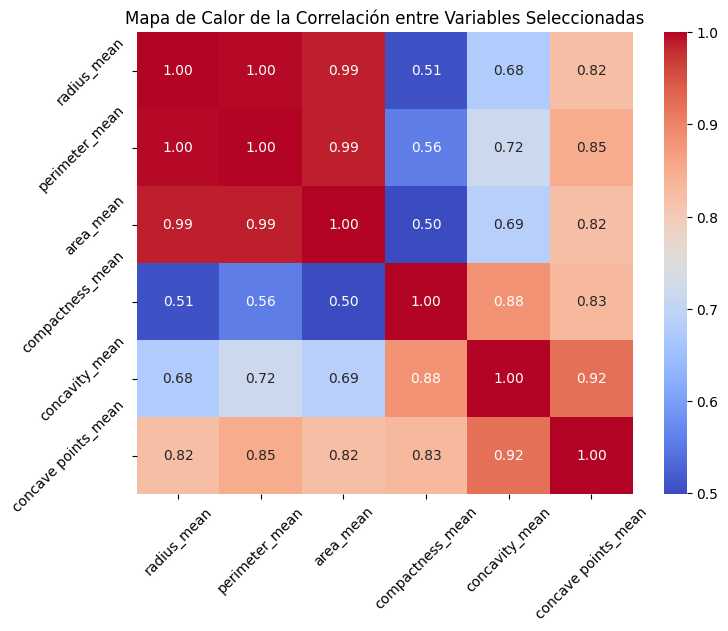

In [ ]:

# Seleccionar las variables específicas para el análisis de correlación
variables_seleccionadas = ['radius_mean', 'perimeter_mean', 'area_mean',
                           'compactness_mean', 'concavity_mean', 'concave points_mean']

# Calcular la matriz de correlación para estas variables
matriz_correlacion_seleccionada = data_df[variables_seleccionadas].corr()

# Crear un mapa de calor usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion_seleccionada, annot=True, fmt=".2f", cmap='coolwarm')

# Añadir título y ajustes de la gráfica
plt.title('Mapa de Calor de la Correlación entre Variables Seleccionadas')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Mostrar el gráfico
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [ ]:
data_df.drop(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se'], axis=1)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
926682,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
926954,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

In [ ]:
import math

plt.figure(figsize=(18, 14), constrained_layout=True)
columnsToPlot = data_df.select_dtypes(include='number').columns
i = 0
for column in columnsToPlot:
    ax = plt.subplot(math.ceil(len(columnsToPlot) / 4), 4, i + 1)
    sns.histplot(data=data_df, x=column,  kde=True)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    i = i + 1

plt.tight_layout()
plt.show()

In [ ]:
data_df.skew()

In [ ]:
positiveSkewColumns = data_df.skew(numeric_only=True).loc[lambda x : x >= 1].keys()
skew_cols = data_df[positiveSkewColumns].copy()
skew_cols

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


In [ ]:
plt.figure(figsize=(18, 14), constrained_layout=True)
columnsToPlot = data_df.select_dtypes(include='number').columns
i = 0
for column in columnsToPlot:
    ax = plt.subplot(math.ceil(len(columnsToPlot) / 4), 4, i + 1)
    sns.boxplot(data=data_df, x=column)
    i = i + 1

plt.tight_layout()
plt.show()

In [ ]:
columnsToScale = data_df.select_dtypes(include='number').max().loc[lambda x : x >= 1].keys()
scale_cols = data_df[columnsToScale].copy()
scale_cols

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)

y = df['diagnosis'].copy()
x = df.drop('diagnosis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer

columnsToDelete = ['perimeter_mean','area_mean','concavity_mean','concave points_mean','perimeter_se','area_se','concavity_se','concave points_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

'''
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self

columnDropperPipe = Pipeline([
    ("columnDropper", columnDropperTransformer(columnsToDelete))
])
'''

preprocessing = make_column_transformer(
    #(columnDropperPipe, x.columns),
    ('drop', columnsToDelete),
    remainder='passthrough'
)


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score

logr_model = Pipeline(steps=[('preprocessing', preprocessing),
                             ('classifier', LogisticRegression())])

logr_model.fit(X_train, y_train)

y_pred = logr_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
print("Matriz de Confusión:\n", conf_matrix)

recall = recall_score(y_test, y_pred, pos_label='M')
print("Recall (Sensibilidad):", recall)

precision = precision_score(y_test, y_pred, pos_label='M')
print("Precision:", precision)

Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

pipelineSqrt = make_pipeline(FunctionTransformer(np.sqrt, inverse_func=np.square))
pipelineScale = make_pipeline(MinMaxScaler())

preprocessing2 = make_column_transformer(
    ('drop', columnsToDelete),
    (pipelineSqrt, skew_cols.columns),
    (pipelineScale, scale_cols.columns),
    remainder='passthrough'
)

In [ ]:
logr_model2 = make_pipeline(preprocessing2, LogisticRegression())
logr_model2.fit(X_train, y_train)
y_predict = logr_model2.predict(X_test)

print('Confusion matrix:')
print(confusion_matrix(y_test, y_predict, labels=['B','M']))
print('Precision = TP / (TP + FP) = ', precision_score(y_test, y_predict, pos_label='M'))
print('Recall = TP / (TP + FN) = ', recall_score(y_test, y_predict, pos_label='M'))
print('Accuracy = (TP + TN) / (TP + TN + FP + FN) ',accuracy_score(y_test, y_predict))

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
logr_model2 = make_pipeline(preprocessing2, LogisticRegression())
logr_model2.fit(X_train, y_train)
y_predict = logr_model2.predict(X_test)

print('Confusion matrix:')
print(confusion_matrix(y_test, y_predict, labels=['B','M']))
print('Precision = TP / (TP + FP) = ', precision_score(y_test, y_predict, pos_label='M'))
print('Recall = TP / (TP + FN) = ', recall_score(y_test, y_predict, pos_label='M'))
print('Accuracy = (TP + TN) / (TP + TN + FP + FN) ',accuracy_score(y_test, y_predict))

# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

xPCA = x.copy()
escalar = StandardScaler()
x_scaled = escalar.fit_transform(xPCA)
x_scaled

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [ ]:
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

# 1. Calcular el porcentaje de varianza acumulada
explained_variance = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# 2. Plot de la curva de varianza acumulada
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.title("% de varianza por componente")
plt.xlabel("N de componentes")
plt.ylabel("Varianza acumulada (%)")
plt.grid(True)
plt.show()

# 3. Determinar el número de componentes necesarios para explicar más del 90% de la varianza
n_componentes = np.where(varianza_acumulada >= 0.99)[0][0] + 1
print('El numero de componentes necesarios para el 99% es: {}'.format(n_componentes))

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
from sklearn.compose import make_column_selector


pipelineStandarScaler = make_pipeline(StandardScaler())
pipelinePCA = make_pipeline(PCA(n_components=n_componentes))

#remainderColumns = '|'.join(x.drop(labels=columnsToDelete, axis=1).columns.to_list())

preprocessing3 = make_column_transformer(
    ('drop', columnsToDelete),
    (pipelineStandarScaler, make_column_selector(dtype_include=np.number)),
    (pipelinePCA, make_column_selector(dtype_include=np.number)),
    remainder='passthrough'
)

logr_model3 = make_pipeline(preprocessing3, LogisticRegression(max_iter=1000))
logr_model3.fit(X_train, y_train)
y_predict = logr_model3.predict(X_test)

print('Confusion matrix:')
print(confusion_matrix(y_test, y_predict, labels=['B','M']))
print('Precision = TP / (TP + FP) = ', precision_score(y_test, y_predict, pos_label='M'))
print('Recall = TP / (TP + FN) = ', recall_score(y_test, y_predict, pos_label='M'))
print('Accuracy = (TP + TN) / (TP + TN + FP + FN) ',accuracy_score(y_test, y_predict))

In [ ]:
pca_transformer = logr_model3['columntransformer'].transformers_[2][1]\
    ['pca']

# Crear una serie con las cargas y las etiquetas de las variables como índice
serie_contribuciones = pd.Series(pca_transformer.components_[0], index=x.columns)

# Obtener el valor absoluto de los valores de las contribuciones y ordenarlos de forma ascendente
serie_contribuciones = serie_contribuciones.abs().sort_values(ascending=True)

# Plot (barras horizontales)
plt.figure(figsize=(12, 8))
plt.barh(serie_contribuciones.index, serie_contribuciones.values, color='skyblue')
plt.xlabel('Valor absoluto contribución de la variable al PCA')
plt.title('Contribución absoluta de las variables al Primer PCA')
plt.grid(axis='x')
plt.show()

# Imprimir las tres variables más importantes
print(serie_contribuciones.sort_values(ascending=False).head(3))

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

In [ ]:
bestThreshold = 0
bestRecall = 0

for i in np.arange(0, 0.95, 0.005):
    y_predict = logr_model3.predict(X_test)
    # changing threshold and predicting
    y_predict_prob_class_1 = logr_model3.predict_proba(X_test)[:,1]
    y_predict_class = ['M' if prob > i else 'B' for prob in y_predict_prob_class_1]

    recall = recall_score(y_test, y_predict_class, pos_label='M')
    if (bestRecall <= recall):
        bestRecall = recall
        bestThreshold = i
    '''
    print('Confusion matrix (threshold={})'.format(i))
    print(confusion_matrix(y_test, y_predict_class, labels=['B','M']))
    print('Precision = TP / (TP + FP) = ', precision_score(y_test, y_predict_class, pos_label='M'))
    print('Recall = TP / (TP + FN) = ', recall)
    print('Accuracy = (TP + TN) / (TP + TN + FP + FN) ',accuracy_score(y_test, y_predict_class))
    print('---------------------------------------')
    '''


print('The best recall ({recall}) was found with {threshold}'.format(recall=bestRecall, threshold=bestThreshold))

y_predict_prob_class_1 = logr_model3.predict_proba(X_test)[:,1]
y_predict_class = ['M' if prob > bestThreshold else 'B' for prob in y_predict_prob_class_1]

print('Confusion matrix (threshold={})'.format(i))
print(confusion_matrix(y_test, y_predict_class, labels=['B','M']))
print('Precision = TP / (TP + FP) = ', precision_score(y_test, y_predict_class, pos_label='M'))
print('Recall = TP / (TP + FN) = ', recall_score(y_test, y_predict_class, pos_label='M'))
print('Accuracy = (TP + TN) / (TP + TN + FP + FN) ',accuracy_score(y_test, y_predict_class))
print('---------------------------------------')

**¿Cuál consideras que es la métrica más importante?**

Considero que la metrica mas importante en este caso seria el Recall(sensibilidad) ya que esto permite capturar todas las salidas y minimizar los falsos positivos.

**¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?**

En cuanto al treshold se opta por usar un threshold muy bajo (0.03) para aumentar en lo mayor posible la sensibilidad (recall) ya que para algo tan sensible como el cancer, preferimos captar todo lo que podamos aun si obtenemos algunos falsos positivos